In [10]:
# Importing the libraries
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
# import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.tree import DecisionTreeRegressor # for building the model

In [11]:
# Import the dataset
dataset = pd.read_csv('transformado.csv')

In [12]:
dataset.head(5)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,compressionratio,horsepower,citympg,...,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,price,gama
0,88.6,168.8,64.1,48.8,2548,130,3.47,9.0,111,21,...,0,0,1,0,0,0,0,1,13495.0,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,9.0,111,21,...,0,0,1,0,0,0,0,1,16500.0,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,9.0,154,19,...,0,0,0,1,0,0,0,1,16500.0,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,10.0,102,24,...,0,0,1,0,0,0,0,1,13950.0,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,8.0,115,18,...,0,1,0,0,0,0,0,1,17450.0,1


In [13]:
# Drop the gama (syntetic) column
dataset = dataset.drop(['gama','price_log'], axis=1)

In [14]:
dataset.shape

(200, 38)

### Separating the features and the target variable

In [15]:
x = dataset.drop(['price'], axis=1) #Features
y = dataset['price'] #target

### Spliting the data into train set and a test set

In [16]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

### Fitting the model to the training dataset

In [33]:
# Initializing the Decision Tree Regression model
model = DecisionTreeRegressor(random_state = 0)

# Fitting the Decision Tree Regression model to the data
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

### Optimizar Hiperparametros

In [28]:
# Max_depth optimizer
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [2, 5, 10, 20]}   # Values to try 

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

#find the best value for 'max_depth'
best_max_depth = grid_search.best_params_['max_depth']
print(" max_depth best value is:", best_max_depth)

 max_depth best value is: 5


### Calculating the loss after training


In [34]:
# Predicting the target values of the test set
y_pred = model.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  2208.785


### Chart of the model 

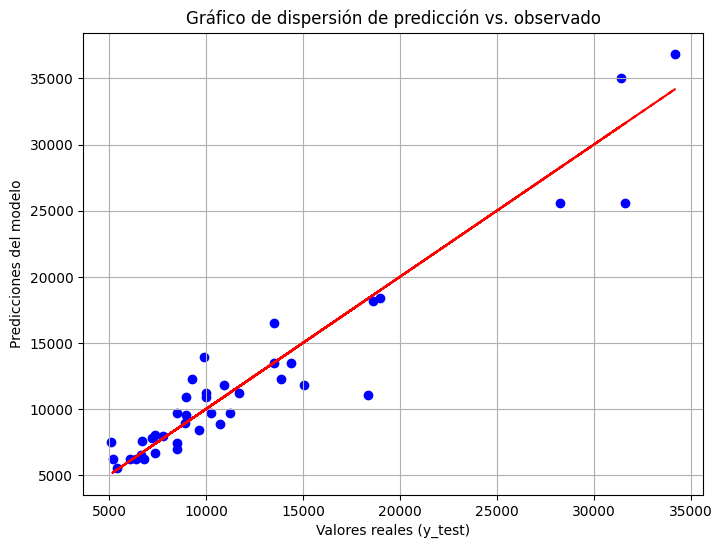

In [36]:

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--')  # Línea diagonal para referencia
plt.title('Gráfico de dispersión de predicción vs. observado')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones del modelo')
plt.grid(True)
plt.show()

In [37]:
# Model saved
import joblib as jb

In [38]:
jb.dump(model, 'price_model.pkl')

['price_model.pkl']